In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install langid
import langid # To detect languages

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
df_train=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")
df_train.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [66]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.



In [67]:
df=df_train

EDA

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [69]:
print("The shape of our data is:",df.shape)

The shape of our data is: (7613, 5)


In [70]:
#Checking for NULL VALUES
print(df.isna())
print(df.isna().sum())

         id  keyword  location   text  target
0     False     True      True  False   False
1     False     True      True  False   False
2     False     True      True  False   False
3     False     True      True  False   False
4     False     True      True  False   False
...     ...      ...       ...    ...     ...
7608  False     True      True  False   False
7609  False     True      True  False   False
7610  False     True      True  False   False
7611  False     True      True  False   False
7612  False     True      True  False   False

[7613 rows x 5 columns]
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Countplot for target Labels')

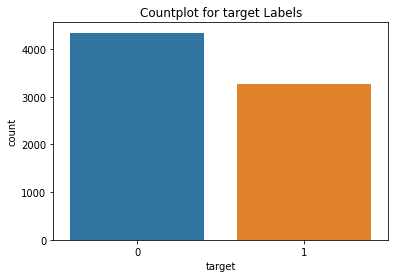

In [71]:
#Let's plot the count(frequency) of column 'target'
sns.countplot(df['target'])
plt.title("Countplot for target Labels")

In [72]:
df['target'].value_counts()

#This tells us that 3271 tweets are about real disasters.
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


Preprocessing Text

In [73]:
!pip install pySpellChecker
!pip install contractions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
# corpus[0:10]


In [75]:
from re import sub
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker
import contractions as ct
import string
import nltk 

In [76]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
# preprocessing
#spell = SpellChecker()

corpus=[]
for i in df['text'].values:
#for i in range(0,100):
  # k=df['text]values[i]
    
    text=i
    
    #expand contraction in text
    text=[ct.fix(i) for i in text.split()]
    text=' '.join(text)
    
    #removing http and @
    text = sub(r"http\S+|@\S+", "", text)

    #Removing Punctuations
    text = sub("[^a-zA-Z]",' ',text)
    
        #Lowercasing
    text=text.lower()
    
    #Tokenization
    text=word_tokenize(text)
   
    #Spelling Correction
    #text = [spell.correction(i) for i in text] 
        
    #join text   
    text = ' '.join(filter(lambda x: x if x is not None else '', text))


    corpus.append(text)

In [78]:
# corpus[0:10]


In [79]:
df['clean_text']=corpus
df.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [80]:
df=df[['clean_text','target']]
df
# ignored columns id, keywords and location

,clean_text,target
0,our deeds are the reason of this earthquake ma...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are be...,1
3,people receive wildfires evacuation orders in ...,1
4,just got sent this photo from ruby alaska as s...,1
...,...,...
7608,two giant cranes holding a bridge collapse int...,1
7609,the out of control wild fires in california ev...,1
7610,m utc km s of volcano hawaii,1
7611,police investigating after an e bike collided ...,1


In [81]:
#Creating the Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#### Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

Testing it with Various ML Models

In [82]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



def classification(model, X, y):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('-Classification Report-\n')
    print(classification_report(y_test, y_pred))
    
    print('Accuracy= ', accuracy_score(y_test, y_pred)*100, '%\n')
    
    print('-Confusion Matrix-\n')
    cm=confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')


Support Vector Machines (SVM)

-Classification Report-

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       886
           1       0.84      0.63      0.72       637

    accuracy                           0.80      1523
   macro avg       0.81      0.77      0.78      1523
weighted avg       0.80      0.80      0.79      1523

Accuracy=  79.57977675640184 %

-Confusion Matrix-



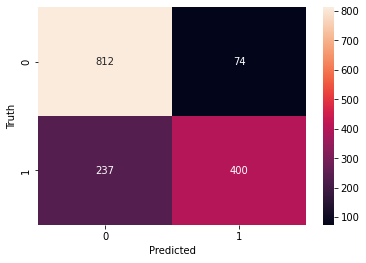

In [83]:
from sklearn.svm import SVC

SVM = SVC(kernel = 'rbf', random_state = 0)
classification(SVM, X, y)

Decision Tree

-Classification Report-

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       886
           1       0.71      0.63      0.67       637

    accuracy                           0.74      1523
   macro avg       0.73      0.72      0.73      1523
weighted avg       0.74      0.74      0.74      1523

Accuracy=  73.99868680236375 %

-Confusion Matrix-



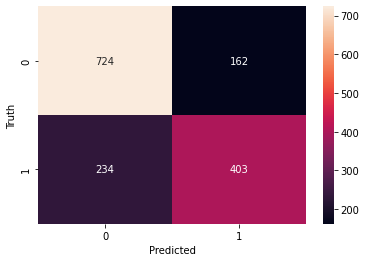

In [84]:
from sklearn.tree import DecisionTreeClassifier

DT= DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classification(DT, X, y)

Random Forest

-Classification Report-

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       886
           1       0.85      0.66      0.74       637

    accuracy                           0.81      1523
   macro avg       0.82      0.79      0.79      1523
weighted avg       0.81      0.81      0.80      1523

Accuracy=  80.82731451083389 %

-Confusion Matrix-



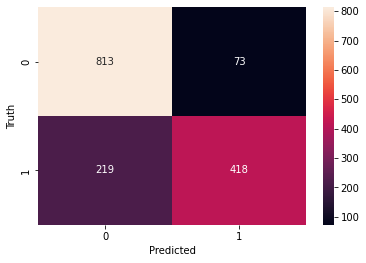

In [85]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators = 100, criterion = 'entropy' , random_state = 0)
classification(RF, X, y)

Predicting the Target Value{0 or 1}

In [86]:
df_test=df_test[['text']]
df_test.head()


,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [87]:
X = cv.fit_transform(df_test['text']).toarray()
df_test['target'] = RF.predict(X)


In [88]:
print(df_test.head())


                                                text  target
0                 Just happened a terrible car crash       1
1  Heard about #earthquake is different cities, s...       0
2  there is a forest fire at spot pond, geese are...       0
3           Apocalypse lighting. #Spokane #wildfires       0
4      Typhoon Soudelor kills 28 in China and Taiwan       0


In [89]:
print(df_test.tail())

                                                   text  target
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...       1
3259  Storm in RI worse than last hurricane. My city...       1
3260  Green Line derailment in Chicago http://t.co/U...       1
3261  MEG issues Hazardous Weather Outlook (HWO) htt...       1
3262  #CityofCalgary has activated its Municipal Eme...       0
